In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_card_transactions.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [6]:
print(df.groupby('is_fraud')['merch_zipcode'].nunique())

is_fraud
0    28329
1     5316
Name: merch_zipcode, dtype: int64


In [7]:
fraud_zipcodes = df.groupby('merch_zipcode')['is_fraud'].mean().sort_values(ascending=False)
print(fraud_zipcodes.head(10))  # Top 10 zip codes with highest fraud rates

merch_zipcode
97884.0    1.0
97845.0    1.0
99159.0    1.0
97819.0    1.0
93455.0    1.0
93444.0    1.0
92116.0    1.0
56527.0    0.5
98433.0    0.5
67487.0    0.5
Name: is_fraud, dtype: float64


In [8]:
from sklearn.impute import KNNImputer

# Filter rows where 'merch_zipcode' is missing
missing_zip_rows = df[df['merch_zipcode'].isnull()]

# Take a sample of 50,000 rows for faster computation
sample_df = df.sample(n=50000, random_state=42)

# Combine missing rows with sample
knn_df = pd.concat([sample_df, missing_zip_rows])

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=3)  # Reduce neighbors to 3 for speed
knn_imputed = knn_imputer.fit_transform(knn_df[['merch_lat', 'merch_long', 'merch_zipcode']])

# Assign back only the missing values
df.loc[df['merch_zipcode'].isnull(), 'merch_zipcode'] = knn_imputed[-len(missing_zip_rows):, 2]

# Check if missing values are gone
print(df['merch_zipcode'].isnull().sum())  # Should print 0


0


In [9]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,99107.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0


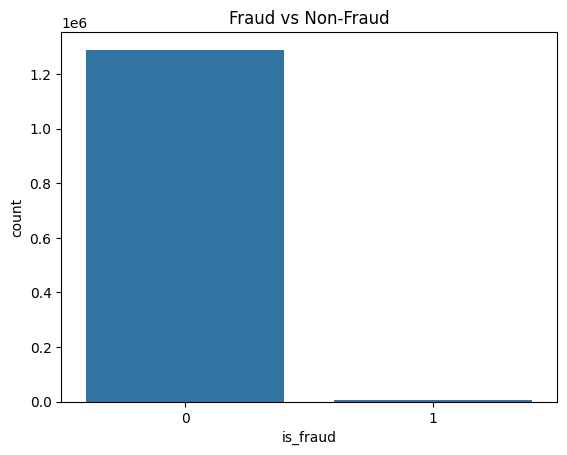

In [10]:
sns.countplot(x=df['is_fraud'])
plt.title("Fraud vs Non-Fraud")
plt.show()

In [11]:
print(df['is_fraud'].value_counts(normalize=True) * 100)

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


In [12]:
# First, handle 'trans_date_trans_time' (assuming this column has full dates)
if 'trans_date_trans_time' in df.columns:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time']).astype(int) / 10**9

# For 'dob', handle cases where there might be just a year or incomplete dates
if 'dob' in df.columns:
    df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
    df['dob'] = pd.to_datetime(df['dob'], format='%Y', errors='coerce')

    # Convert to timestamp (if valid)
    df['dob'] = df['dob'].astype(int) / 10**9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  float64
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [14]:
df['gender'].value_counts()

,count
gender,
F,709863
M,586812


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

In [16]:
df.drop(columns=['gender'], inplace=True)

In [17]:
df = df.drop(['Unnamed: 0', 'first', 'last', 'trans_num'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  float64
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   street                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  city_pop               1296675 non-null  int64  
 12  job                    1296675 non-null  object 
 13  dob                    1296675 non-null  float64
 14  unix_time         

In [19]:
df['merchant_encoded'] = df['merchant'].map(df['merchant'].value_counts())
df['city_encoded'] = df['city'].map(df['city'].value_counts())
df['street_encoded'] = df['street'].map(df['street'].value_counts())
df['state_encoded'] = df['state'].map(df['state'].value_counts())
df['job_encoded'] = df['job'].map(df['job'].value_counts())

category_mean = df.groupby('category')['is_fraud'].mean()
df['category_encoded'] = df['category'].map(category_mean)

In [20]:
df = df.drop(['merchant', 'city', 'street', 'state', 'job', 'category'], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  float64
 1   cc_num                 1296675 non-null  int64  
 2   amt                    1296675 non-null  float64
 3   zip                    1296675 non-null  int64  
 4   lat                    1296675 non-null  float64
 5   long                   1296675 non-null  float64
 6   city_pop               1296675 non-null  int64  
 7   dob                    1296675 non-null  float64
 8   unix_time              1296675 non-null  int64  
 9   merch_lat              1296675 non-null  float64
 10  merch_long             1296675 non-null  float64
 11  is_fraud               1296675 non-null  int64  
 12  merch_zipcode          1296675 non-null  float64
 13  gender_encoded         1296675 non-null  int64  
 14  merchant_encoded  

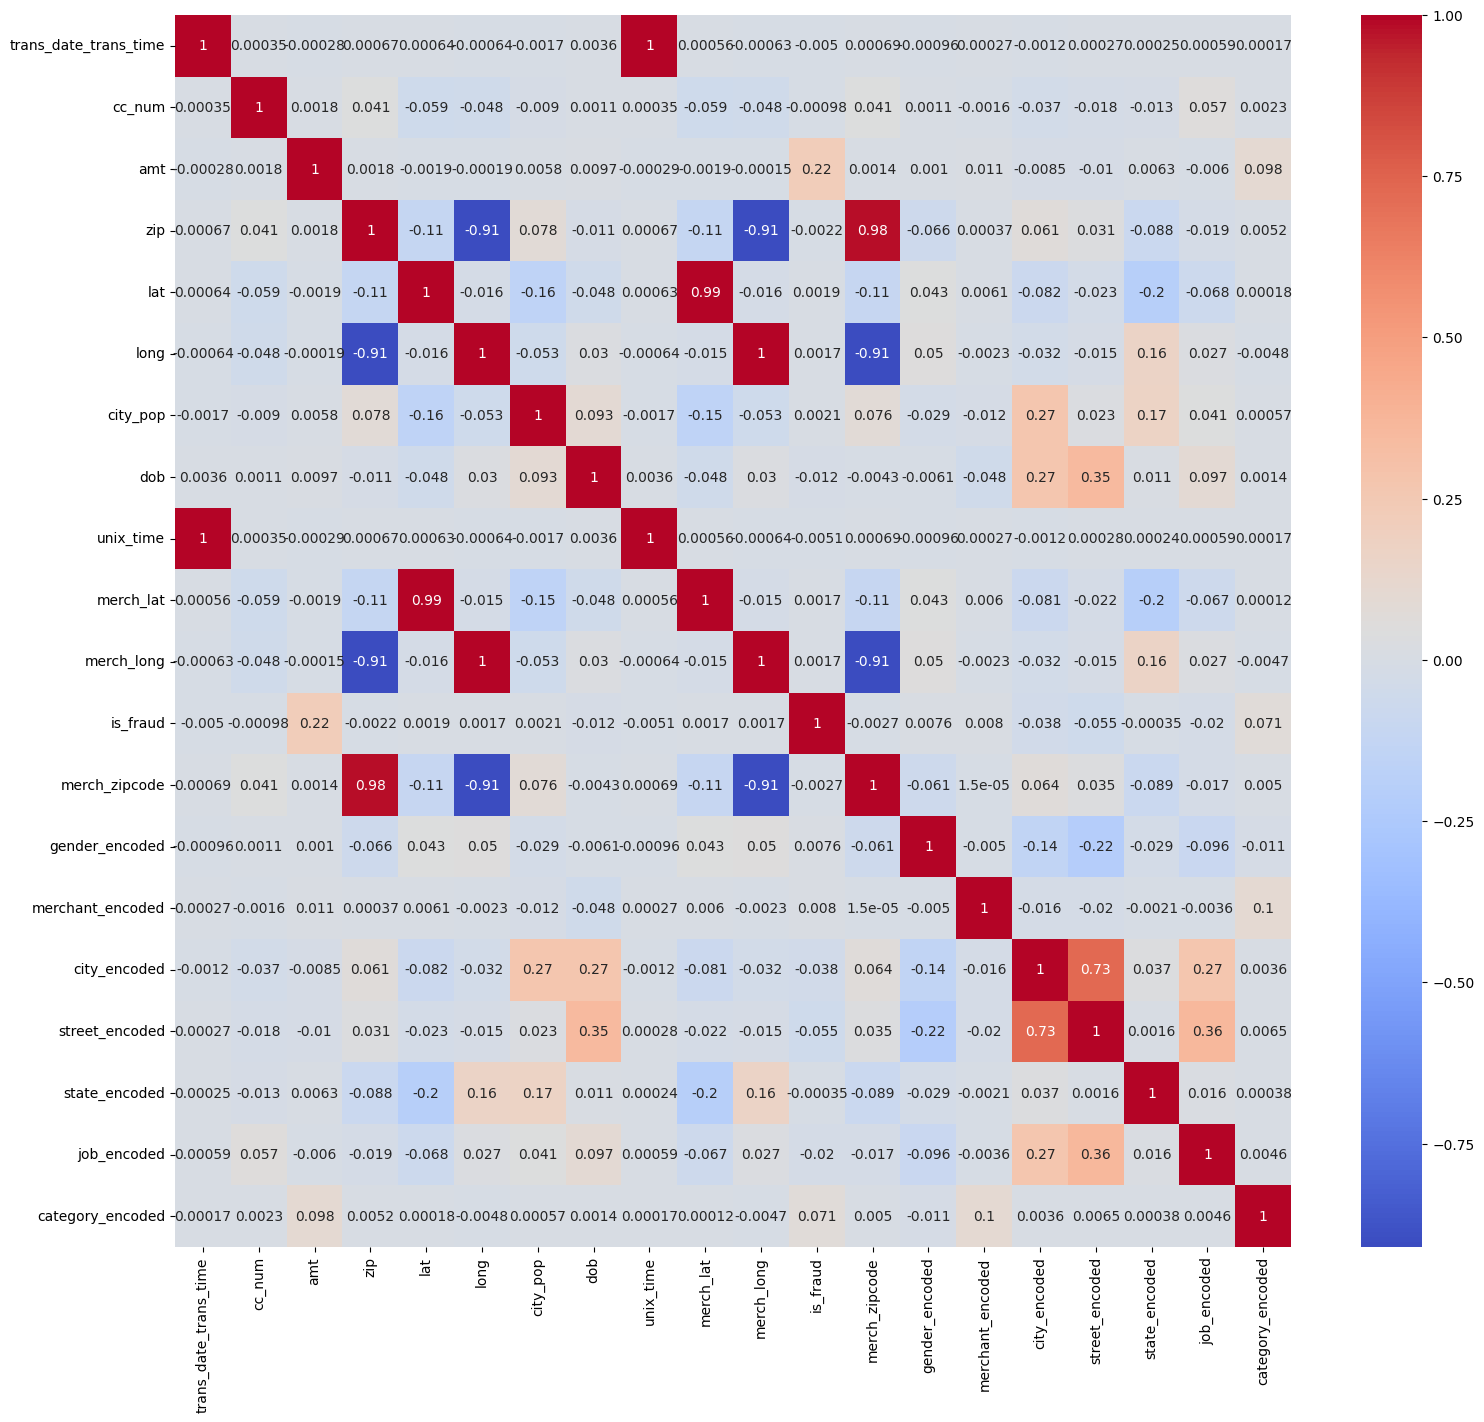

In [22]:
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [23]:
# drop unix_time, merch_zip, merch_lat, merch_long
df = df.drop(['unix_time', 'merch_zipcode', 'merch_lat', 'merch_long'], axis=1)

In [24]:
# Convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], unit='s')

# Now extract the hour, day of week, and month
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

In [25]:
 # Log transformation to reduce skewness
df['log_amt'] = np.log1p(df['amt'])

In [26]:
df.head()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,is_fraud,gender_encoded,merchant_encoded,city_encoded,street_encoded,state_encoded,job_encoded,category_encoded,hour,day_of_week,month,log_amt
0,2019-01-01 00:00:18,2703186189652095,4.97,28654,36.0788,-81.1781,3495,573868800.0,0,0,1267,2028,2028,30266,3545,0.014458,0,1,1,1.786747
1,2019-01-01 00:00:44,630423337322,107.23,99160,48.8878,-118.2105,149,267235200.0,0,0,2503,3545,3030,18924,5099,0.014098,0,1,1,4.684259
2,2019-01-01 00:00:51,38859492057661,220.11,83252,42.1808,-112.2620,4154,-250905600.0,0,1,1895,503,503,5545,511,0.002478,0,1,1,5.398660
3,2019-01-01 00:01:16,3534093764340240,45.00,59632,46.2306,-112.1138,1939,-93744000.0,0,1,2613,493,493,11754,2530,0.004694,0,1,1,3.828641
4,2019-01-01 00:03:06,375534208663984,41.96,24433,38.4207,-79.4629,99,512352000.0,0,1,1592,2017,2017,29250,2017,0.003139,0,1,1,3.760269


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X, y = df.drop(['is_fraud'], axis=1), df['is_fraud']

if 'trans_date_trans_time' in X.columns:
    X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time']).astype(int) / 10**9

X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = xgb_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")

Accuracy: 0.9983245033626287
Precision: 0.9981090194743925
Recall: 0.9985492219961157
F1-Score: 0.9983290722096086
ROC-AUC: 0.9983239371666673


In [34]:
from sklearn.metrics import accuracy_score

y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy}")


Train Accuracy: 0.9985378174889827


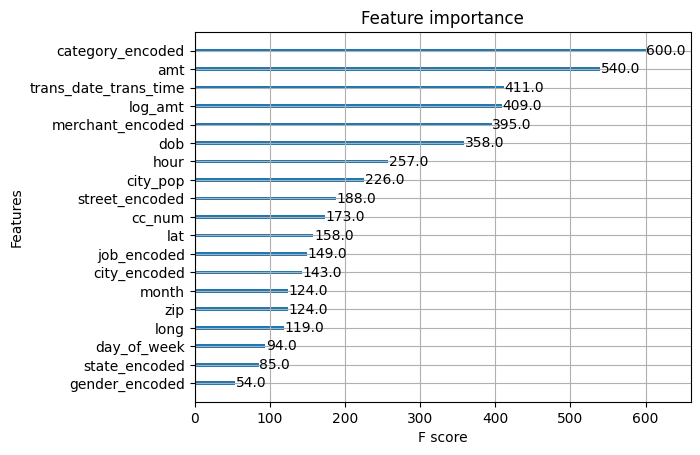

In [37]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model, importance_type='weight')  # Shows most used features
plt.show()


In [38]:
sample_fraud = X_test[y_test == 1].sample(5)  # Random fraud cases
sample_legit = X_test[y_test == 0].sample(5)  # Random non-fraud cases

print("Fraud Cases Prediction:", xgb_model.predict(sample_fraud))
print("Legit Cases Prediction:", xgb_model.predict(sample_legit))


Fraud Cases Prediction: [1 1 1 1 1]
Legit Cases Prediction: [0 0 0 0 0]


In [40]:
import joblib
joblib.dump(xgb_model, "fraud_detection_xgb.pkl")


['fraud_detection_xgb.pkl']

In [41]:
from google.colab import files
files.download("fraud_detection_xgb.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>